# Analyse Exploratoire Avancee des Donnees (EDA)
## Donnees de Performance des Etudiants au Maroc

**Objectif :** Comprendre les donnees en profondeur avant la modelisation, decouvrir les patterns, les relations et les valeurs aberrantes.

### Etapes :
1. Chargement des donnees et apercu general
2. Statistiques descriptives
3. Analyse des valeurs manquantes
4. Verification des doublons
5. Analyse de la variable cible
6. Distribution des variables categorielles
7. Distribution des variables numeriques
8. Asymetrie et Aplatissement (Skewness & Kurtosis)
9. Detection des valeurs aberrantes (Outliers)
10. Analyse de correlation
11. Analyse bivariee
12. Tableaux croises (Cross-tabulation)
13. Pair Plot
14. Conclusions

In [1]:
# === Etape 1 : Importation des bibliotheques ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Configuration des graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

print(" Bibliotheques importees avec succes.")

 Bibliotheques importees avec succes.


## 1. Chargement des donnees et apercu general
On commence par charger le fichier de donnees et afficher les informations de base : nombre de lignes, colonnes, types de donnees et les 5 premiers enregistrements.

In [2]:
# === Chargement des donnees ===
df = pd.read_csv('../dataset/Morocco_Student_Data_Cleaned.csv', low_memory=False)

print(f" Donnees chargees avec succes.")
print(f" Nombre de lignes : {df.shape[0]:,}")
print(f" Nombre de colonnes : {df.shape[1]}")
print(f"\n--- Types de donnees ---")
print(df.dtypes.value_counts())
print(f"\n--- 5 premiers enregistrements ---")
display(df.head())

 Donnees chargees avec succes.
 Nombre de lignes : 10,000
 Nombre de colonnes : 268

--- Types de donnees ---
object     172
float64     53
int64       43
Name: count, dtype: int64

--- 5 premiers enregistrements ---


,id_etudiant,prenom,nom,nom_complet,sexe,date_naissance,age,code_massar,region,province,...,autre_langue,locuteur_amazigh,maitrise_darija,francais_maison,performance_cible,niveau_risque,intervention_necessaire,date_collecte,id_collecteur,statut_verification
0,STU00001,Soumia,Chraibi,Soumia Chraibi,F,2007-05-05,19,G548679848,Fes-Meknes,El Hajeb,...,Non,Natif,Rarement,Tres Eleve,0.54,Moyen,Oui,2026-01-15,COL008,Verifie
1,STU00002,Mehdi,Tazi,Mehdi Tazi,M,2009-10-12,17,G478451439,Souss-Massa,Inezgane,...,Oui,Natif,Parfois,Eleve,0.08,Eleve,Oui,2026-01-15,COL005,Verifie
2,STU00003,Bilal,Lahbabi,Bilal Lahbabi,M,2008-08-08,18,G727518594,Casablanca-Settat,Berrechid,...,Oui,Natif,Souvent,Tres Eleve,0.47,Eleve,Oui,2026-01-15,COL001,Verifie
3,STU00004,Hakim,Chraibi,Hakim Chraibi,M,2009-10-05,17,G868905524,Tanger-Tetouan-Al Hoceima,Larache,...,Non,Natif,Parfois,Eleve,0.55,Moyen,Oui,2026-01-15,COL008,Verifie
4,STU00005,Ayoub,Lahbabi,Ayoub Lahbabi,M,2007-05-27,19,G809425460,Casablanca-Settat,El Jadida,...,Non,Natif,Souvent,Eleve,0.15,Eleve,Oui,2026-01-15,COL004,Verifie


## 2. Statistiques descriptives (Descriptive Statistics)
On affiche la moyenne, l'ecart-type, le minimum, le maximum et les quartiles pour toutes les variables numeriques.

In [3]:
# === Statistiques descriptives ===
print("--- Statistiques des variables numeriques ---")
display(df.describe().T.round(2))

print("\n--- Statistiques des variables categorielles ---")
display(df.describe(include='object').T)

--- Statistiques des variables numeriques ---


,count,mean,std,min,25%,50%,75%,max
age,10000.0,1.809000e+01,0.79,1.700000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.900000e+01
code_postal,10000.0,5.205200e+04,24579.42,1.000000e+04,3.100000e+04,5.200000e+04,7.300000e+04,9.500000e+04
telephone,10000.0,6.551848e+08,25970315.41,6.100040e+08,6.327122e+08,6.552471e+08,6.776673e+08,6.999856e+08
annee_inscription,10000.0,2.024000e+03,0.00,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03
revenu_mensuel_pere,10000.0,8.859260e+03,5472.46,0.000000e+00,4.613750e+03,7.337000e+03,1.185025e+04,2.270500e+04
...,...,...,...,...,...,...,...,...
niveau_litteratie_numerique,10000.0,4.400000e+01,16.72,1.500000e+01,3.000000e+01,4.400000e+01,5.700000e+01,7.500000e+01
competitions_scolaires,10000.0,2.890000e+00,1.96,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
prix_recus,10000.0,5.800000e+00,3.68,0.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
experience_stage,10000.0,5.858000e+01,34.30,0.000000e+00,2.900000e+01,5.800000e+01,8.800000e+01,1.200000e+02



--- Statistiques des variables categorielles ---


,count,unique,top,freq
id_etudiant,10000,10000,STU00001,1
prenom,10000,80,Yasmine,169
nom,10000,50,Tazi,281
nom_complet,10000,3584,Marouane Lahlou,12
sexe,10000,2,F,5017
...,...,...,...,...
niveau_risque,10000,4,Eleve,6508
intervention_necessaire,10000,2,Oui,8088
date_collecte,10000,1,2026-01-15,10000
id_collecteur,10000,10,COL008,1061


## 3. Analyse des valeurs manquantes (Missing Values Analysis)
On etudie le nombre et le pourcentage de valeurs manquantes par colonne, avec une visualisation graphique pour identifier les colonnes a supprimer ou a imputer.

 Colonnes avec valeurs manquantes : 0 sur 268
 Colonnes entierement vides (100%) : 0


,Nb_manquantes,Pourcentage_%


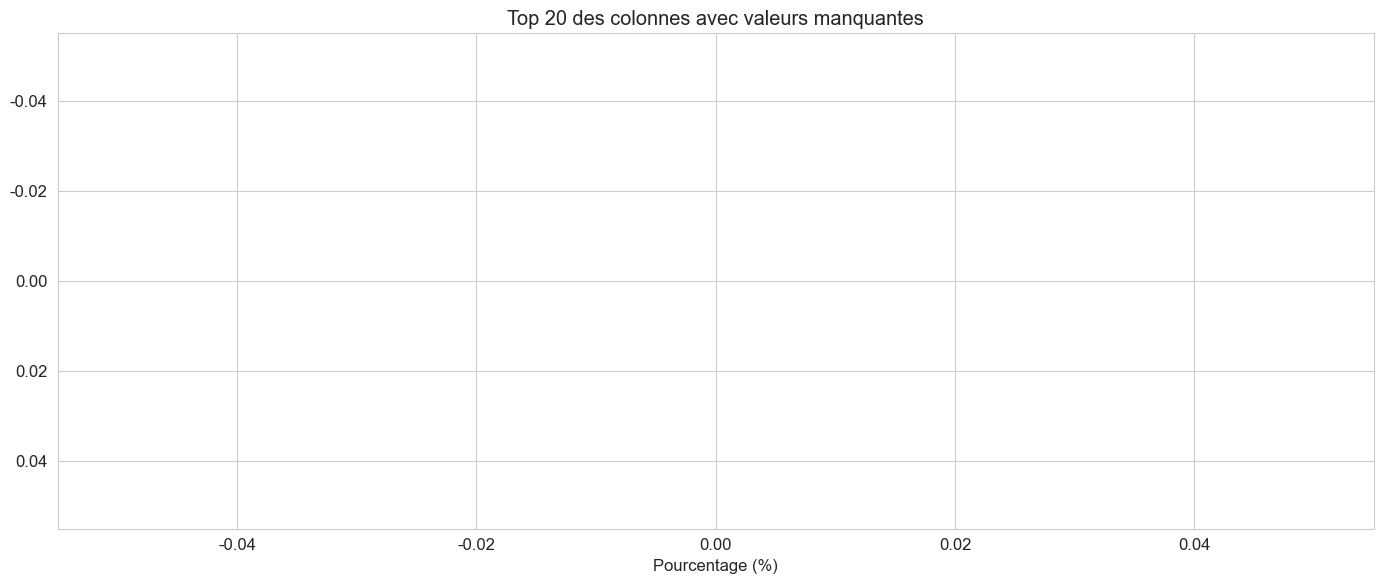

In [4]:
# === Analyse des valeurs manquantes ===

# Calcul du nombre et pourcentage de valeurs manquantes
missing = pd.DataFrame({
    'Nb_manquantes': df.isnull().sum(),
    'Pourcentage_%': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Nb_manquantes'] > 0].sort_values('Pourcentage_%', ascending=False)

print(f" Colonnes avec valeurs manquantes : {len(missing)} sur {df.shape[1]}")
print(f" Colonnes entierement vides (100%) : {(missing['Pourcentage_%'] == 100).sum()}")
display(missing.head(20))

# Graphique des 20 colonnes avec le plus de valeurs manquantes
fig, ax = plt.subplots(figsize=(14, 6))
top_missing = missing.head(20)
bars = ax.barh(top_missing.index, top_missing['Pourcentage_%'], color='salmon')
ax.set_xlabel('Pourcentage (%)')
ax.set_title('Top 20 des colonnes avec valeurs manquantes')
ax.invert_yaxis()
for bar, val in zip(bars, top_missing['Pourcentage_%']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val}%', va='center', fontsize=9)
plt.tight_layout()
plt.show()

## 4. Verification des doublons (Duplicates Check)
On verifie l'existence de lignes dupliquees entierement ou basees sur l'identifiant unique.

In [5]:
# === Verification des doublons ===

# Lignes entierement dupliquees
dup_total = df.duplicated().sum()
print(f" Lignes entierement dupliquees : {dup_total}")

# Doublons bases sur l'identifiant unique
if 'id_etudiant' in df.columns:
    dup_id = df.duplicated(subset='id_etudiant').sum()
    print(f" Doublons bases sur id_etudiant : {dup_id}")

# Doublons bases sur le code Massar
if 'code_massar' in df.columns:
    dup_massar = df.duplicated(subset='code_massar').sum()
    print(f" Doublons bases sur code_massar : {dup_massar}")

if dup_total == 0:
    print("\n Aucune ligne dupliquee detectee.")
else:
    print(f"\n {dup_total} lignes dupliquees a traiter.")

 Lignes entierement dupliquees : 0
 Doublons bases sur id_etudiant : 0
 Doublons bases sur code_massar : 0

 Aucune ligne dupliquee detectee.


## 5. Analyse de la variable cible (Target Variable)
La variable cible principale selon le rapport est `moyenne_annuelle` (numerique continue, probleme de regression). On etudie egalement `performance_cible` (numerique, score entre 0 et 1) et `probabilite_reussite` (categorielle : Tres Faible, Faible, Moyen, Eleve), et on verifie l'equilibre entre les classes.

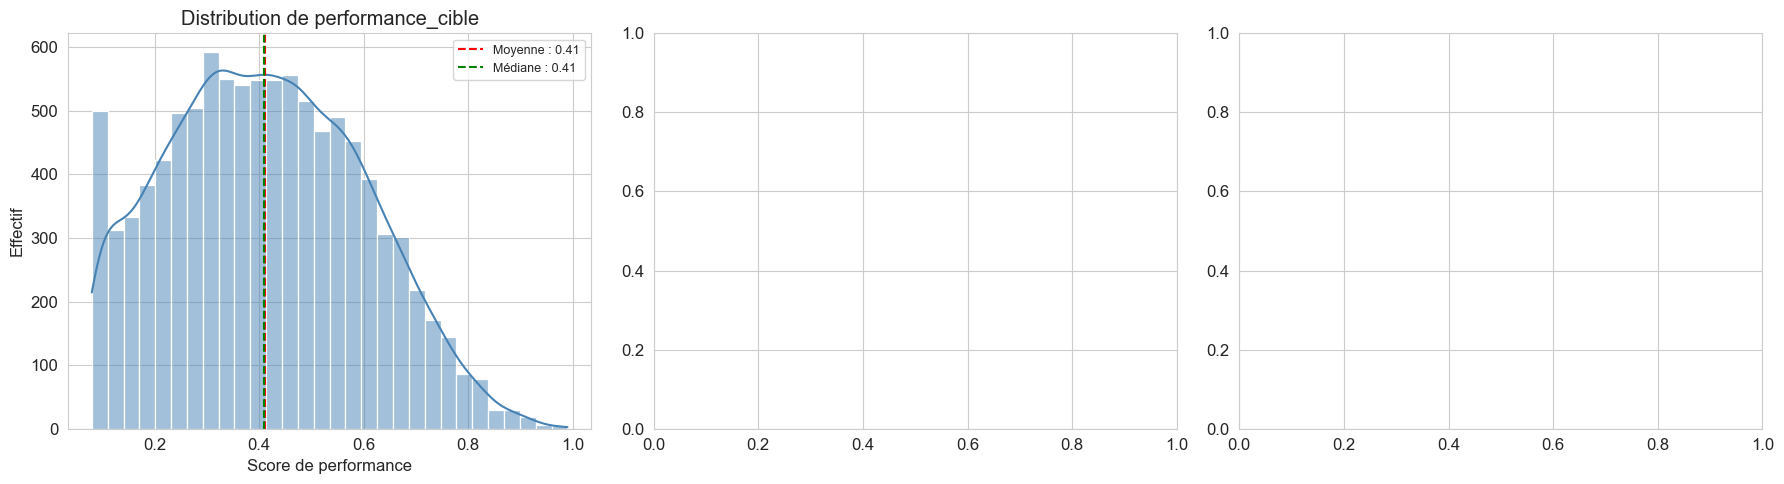

In [6]:
# === Analyse de la variable cible ===

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
total = len(df)

# 1. Distribution de performance_cible (numerique continue)
if 'performance_cible' in df.columns:
    sns.histplot(df['performance_cible'], kde=True, ax=axes[0], color='steelblue', bins=30)
    axes[0].axvline(df['performance_cible'].mean(), color='red', linestyle='--',
                    label=f'Moyenne : {df["performance_cible"].mean():.2f}')
    axes[0].axvline(df['performance_cible'].median(), color='green', linestyle='--',
                    label=f'Mediane : {df["performance_cible"].median():.2f}')
    axes[0].set_title('Distribution de performance_cible')
    axes[0].set_xlabel('Score de performance')
    axes[0].set_ylabel('Effectif')
    axes[0].legend(fontsize=9)

# 2. Distribution de probabilite_reussite (categorielle)
if 'probabilite_reussite' in df.columns:
    prob_order = ['Tres Faible', 'Faible', 'Moyen', 'Eleve']
    existing_prob = [x for x in prob_order if x in df['probabilite_reussite'].values]
    sns.countplot(x='probabilite_reussite', data=df, order=existing_prob,
                  hue='probabilite_reussite', palette='coolwarm', legend=False, ax=axes[1])
    axes[1].set_title('Distribution de probabilite_reussite')
    axes[1].set_xlabel('Niveau de probabilite')
    axes[1].set_ylabel('Effectif')
    for p in axes[1].patches:
        pct = f'{100 * p.get_height() / total:.1f}%'
        axes[1].annotate(pct, (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)

# 3. Relation : performance_cible par probabilite_reussite
if 'performance_cible' in df.columns and 'probabilite_reussite' in df.columns:
    sns.boxplot(x='probabilite_reussite', y='performance_cible', data=df,
                order=existing_prob, hue='probabilite_reussite', palette='coolwarm',
                legend=False, ax=axes[2])
    axes[2].set_title('Performance par niveau de probabilite de reussite')

plt.tight_layout()
plt.show()

# Verification de l'equilibre des classes
if 'probabilite_reussite' in df.columns:
    print("\n--- Equilibre des classes (probabilite_reussite) ---")
    balance = df['probabilite_reussite'].value_counts()
    balance_pct = df['probabilite_reussite'].value_counts(normalize=True) * 100
    print(pd.DataFrame({'Effectif': balance, 'Pourcentage %': balance_pct.round(1)}))

## 6. Distribution des variables categorielles
On affiche la distribution des principales variables categorielles pour comprendre la composition de l'echantillon.

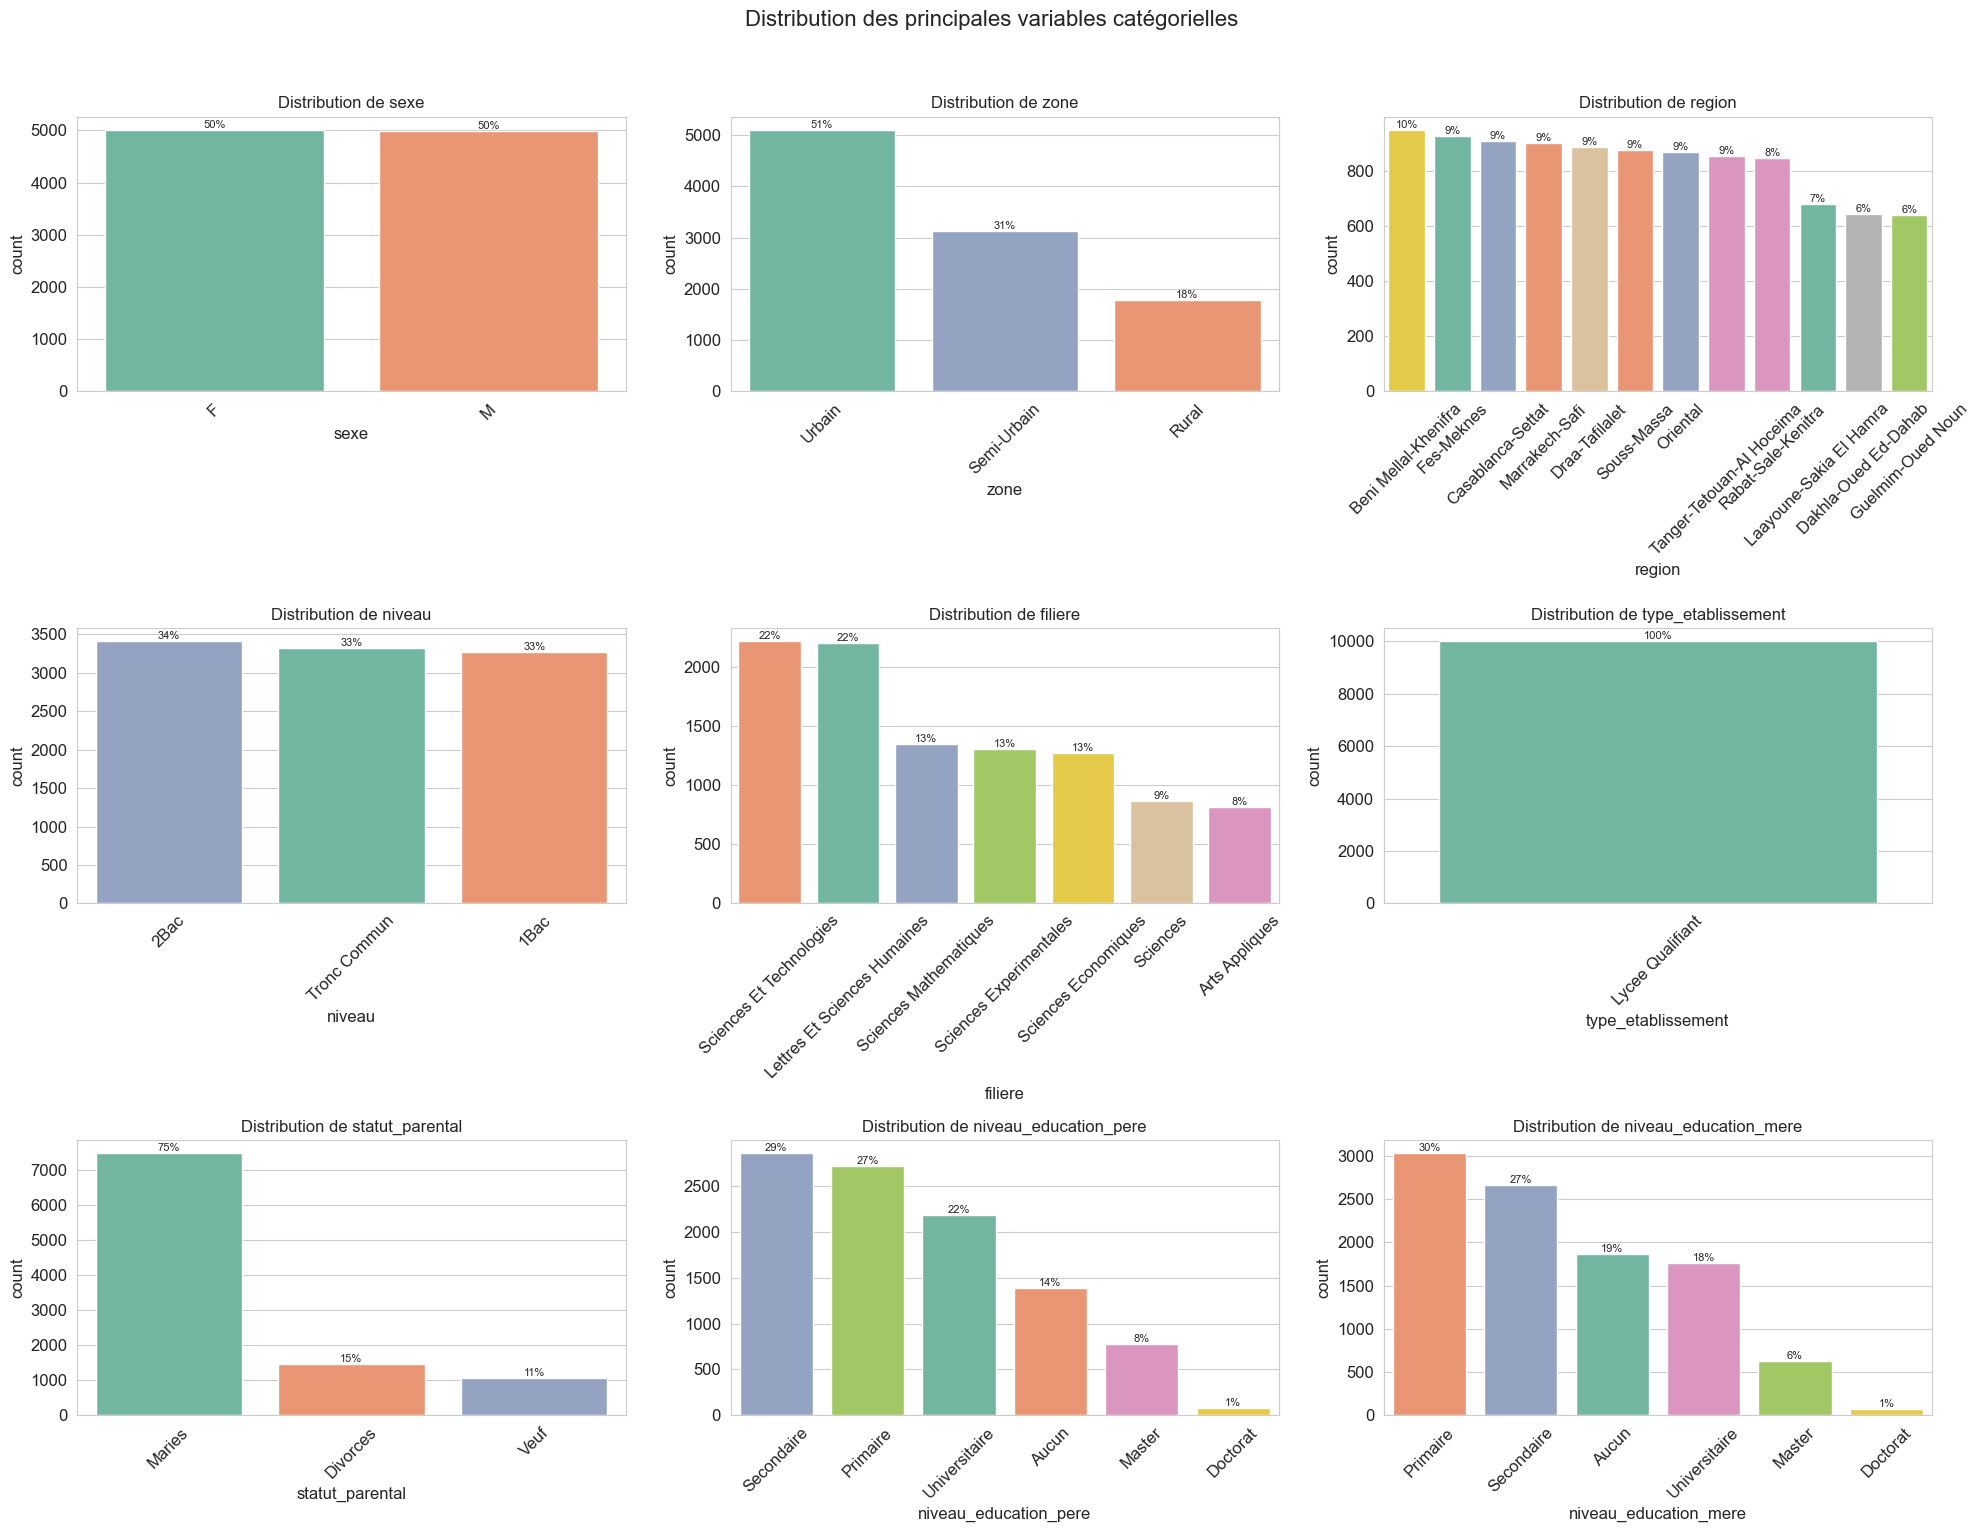

In [7]:
# === Distribution des variables categorielles ===

cat_features = ['sexe', 'zone', 'region', 'niveau', 'filiere', 'type_etablissement',
                'statut_parental', 'niveau_education_pere', 'niveau_education_mere']

# Filtrer les colonnes existantes
cat_features = [c for c in cat_features if c in df.columns]

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    if i < len(axes):
        order = df[col].value_counts().index
        sns.countplot(x=col, data=df, order=order, hue=col, 
                     palette='Set2', legend=False, ax=axes[i])
        axes[i].set_title(f'Distribution de {col}', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        # Ajout des pourcentages
        total = len(df)
        for p in axes[i].patches:
            if p.get_height() > 0:
                pct = f'{100 * p.get_height() / total:.0f}%'
                axes[i].annotate(pct, (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='bottom', fontsize=8)

# Masquer les axes vides
for j in range(len(cat_features), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribution des principales variables categorielles', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 7. Distribution des variables numeriques
On trace l'histogramme et le boxplot des principales variables numeriques pour comprendre la forme de la distribution et detecter les valeurs aberrantes.

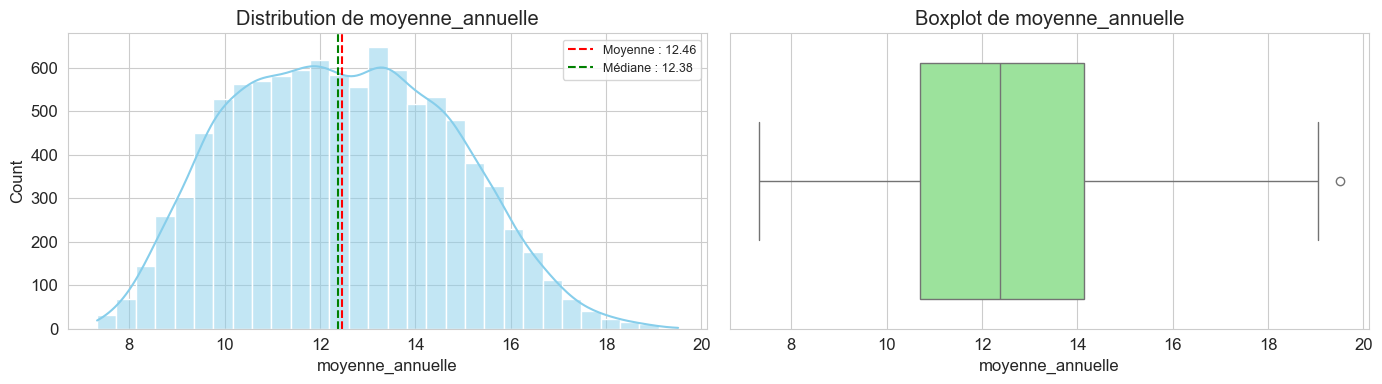

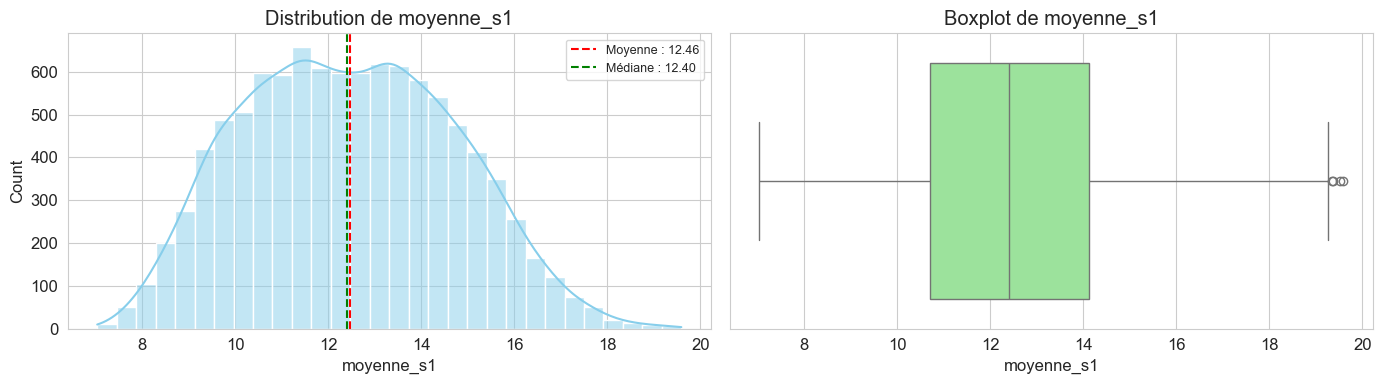

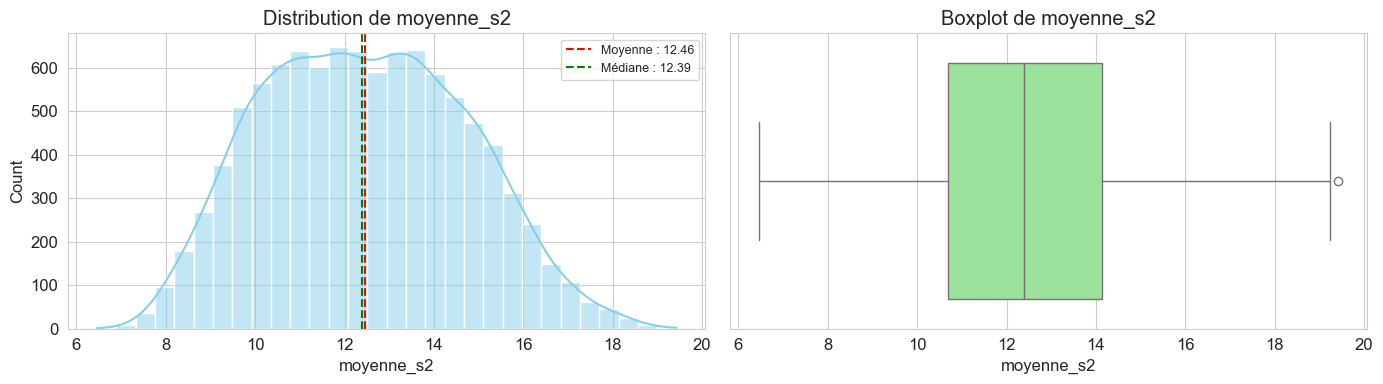

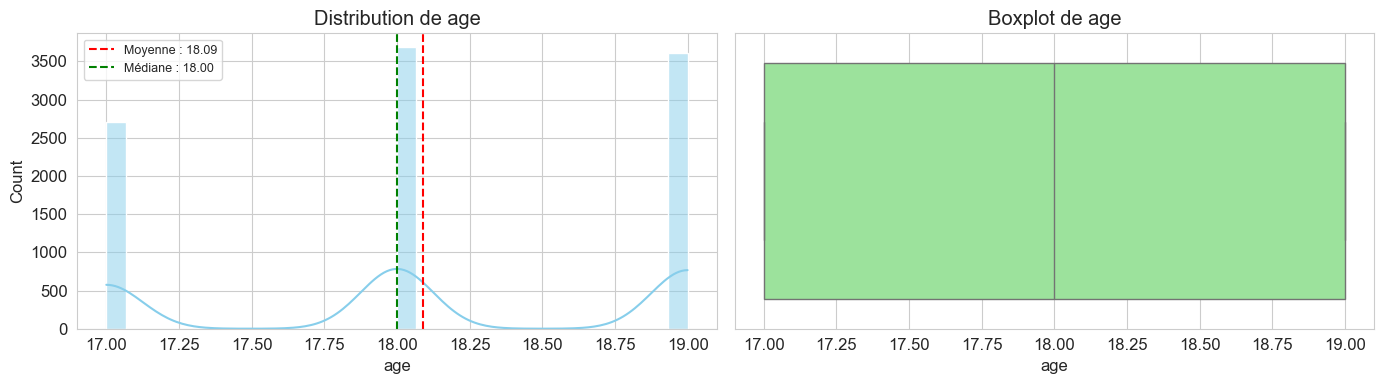

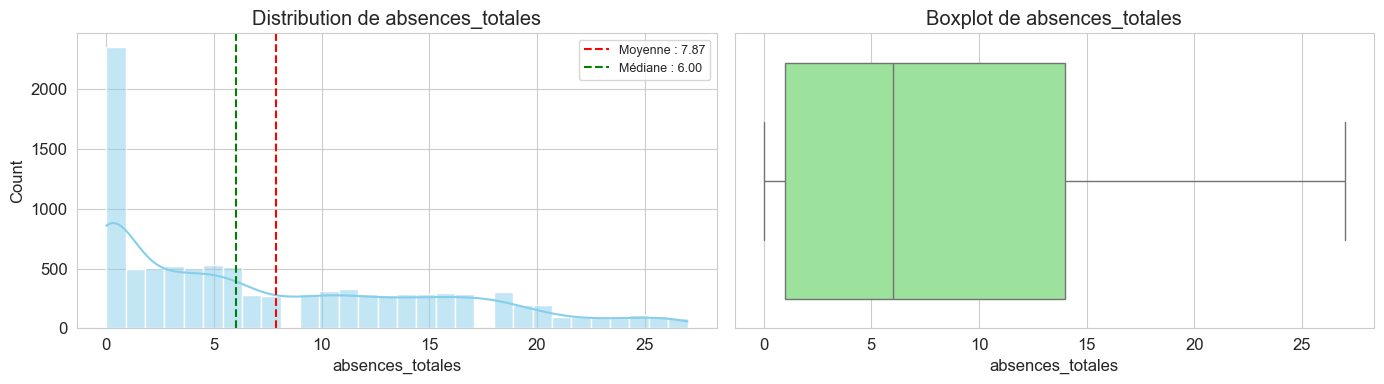

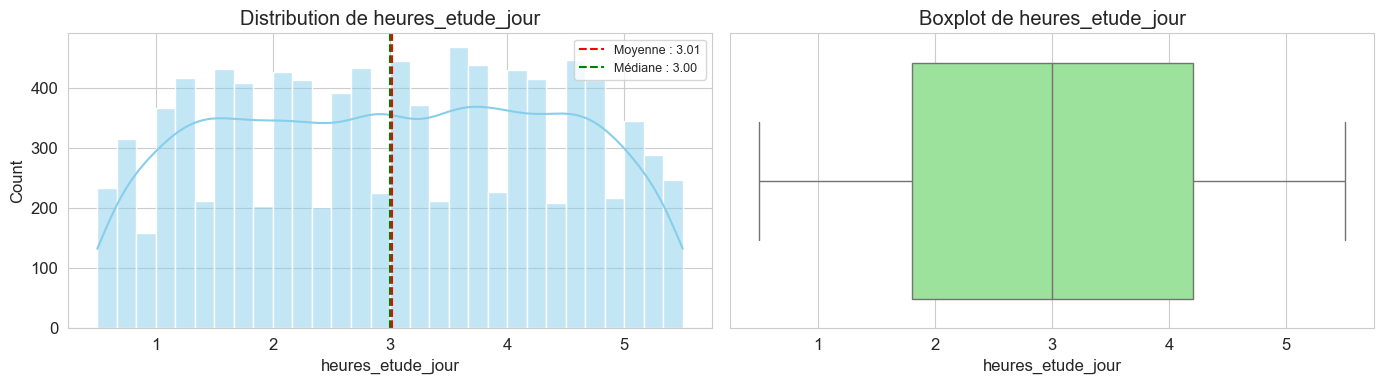

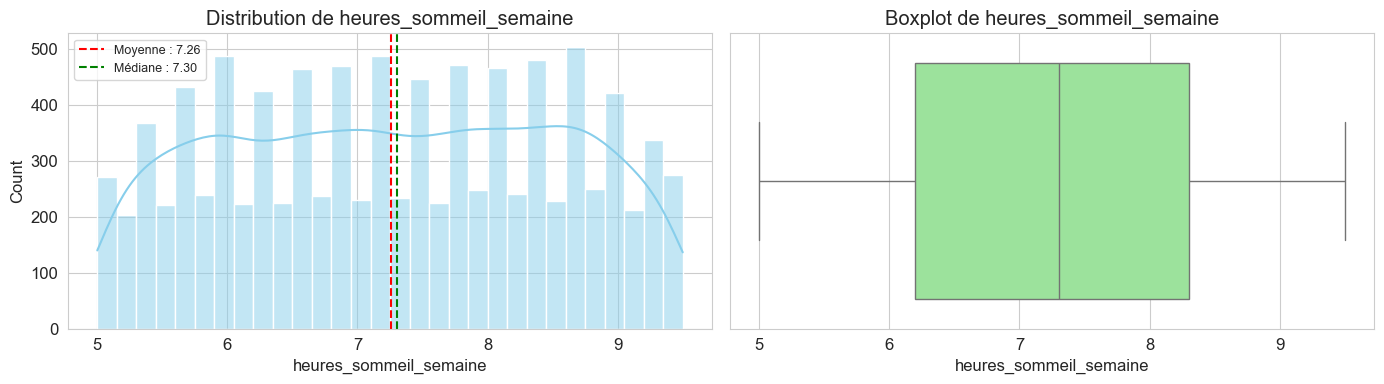

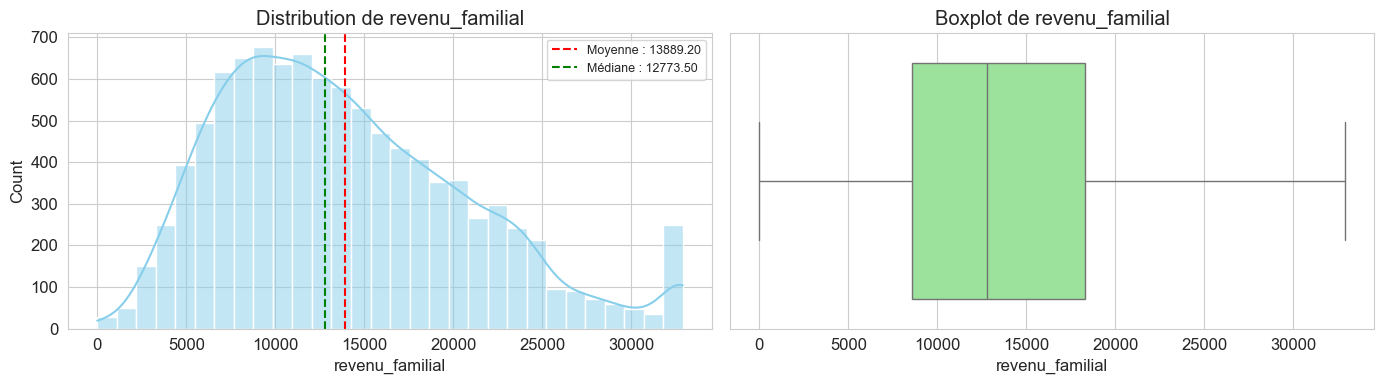

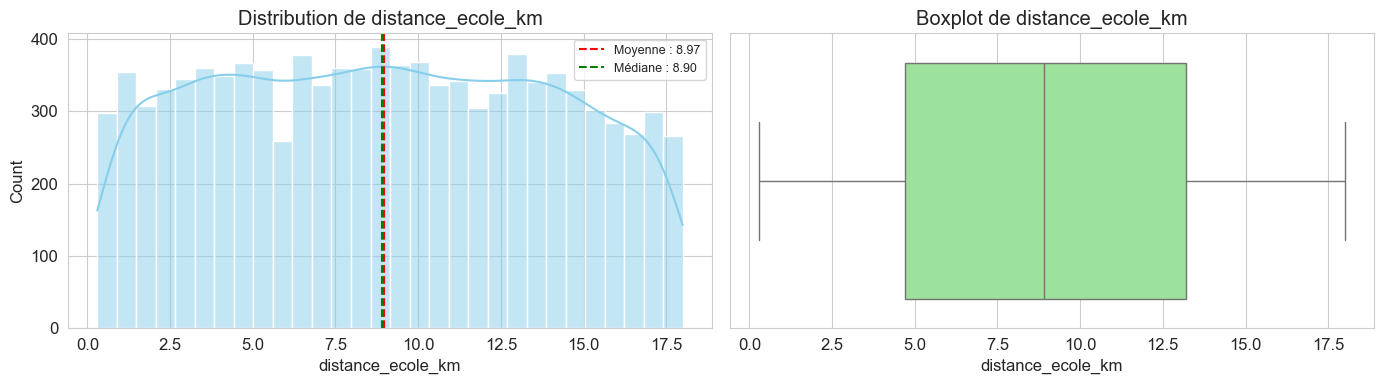

In [8]:
# === Distribution des variables numeriques ===

num_features = ['moyenne_annuelle', 'moyenne_s1', 'moyenne_s2', 'age', 
                'absences_totales', 'heures_etude_jour', 'heures_sommeil_semaine',
                'revenu_familial', 'distance_ecole_km']

num_features = [c for c in num_features if c in df.columns]

for col in num_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Histogramme avec courbe de densite
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].axvline(df[col].mean(), color='red', linestyle='--', label=f'Moyenne : {df[col].mean():.2f}')
    axes[0].axvline(df[col].median(), color='green', linestyle='--', label=f'Mediane : {df[col].median():.2f}')
    axes[0].set_title(f'Distribution de {col}')
    axes[0].legend(fontsize=9)
    
    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()

## 8. Asymetrie et Aplatissement (Skewness & Kurtosis)
On mesure le degre de symetrie des distributions (asymetrie) et l'epaisseur des queues (aplatissement). Cela aide a decider si une transformation logarithmique est necessaire.

--- Variables avec forte asymetrie (|skew| > 1) ---
Nombre de variables : 5


,Asymetrie (Skewness),Aplatissement (Kurtosis)
montant_tayssir,1.577,0.546
annees_redoublement,1.484,0.202
heures_travail_semaine,1.373,0.636
absences_non_justifiees,1.327,1.771
cout_mensuel_soutien,1.116,0.280


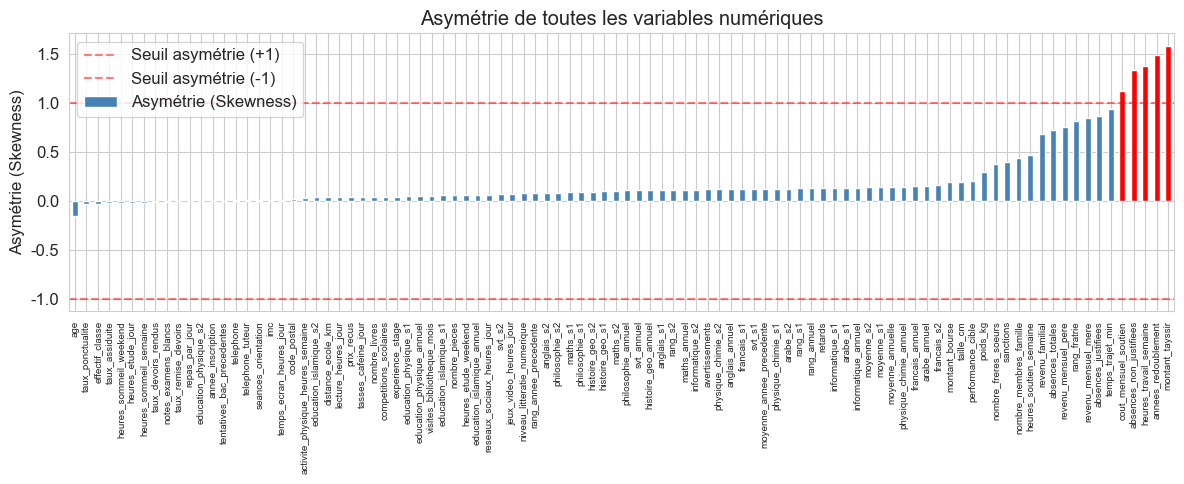

In [9]:
# === Asymetrie et Aplatissement ===

numeric_cols = df.select_dtypes(include=[np.number]).columns
skew_kurt = pd.DataFrame({
    'Asymetrie (Skewness)': df[numeric_cols].skew().round(3),
    'Aplatissement (Kurtosis)': df[numeric_cols].kurtosis().round(3)
}).sort_values('Asymetrie (Skewness)', ascending=False)

print("--- Variables avec forte asymetrie (|skew| > 1) ---")
high_skew = skew_kurt[abs(skew_kurt['Asymetrie (Skewness)']) > 1]
print(f"Nombre de variables : {len(high_skew)}")
display(high_skew)

# Graphique
fig, ax = plt.subplots(figsize=(12, 5))
skew_vals = skew_kurt['Asymetrie (Skewness)'].sort_values()
colors = ['red' if abs(v) > 1 else 'steelblue' for v in skew_vals]
skew_vals.plot(kind='bar', color=colors, ax=ax)
ax.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Seuil asymetrie (+1)')
ax.axhline(y=-1, color='red', linestyle='--', alpha=0.5, label='Seuil asymetrie (-1)')
ax.set_title('Asymetrie de toutes les variables numeriques')
ax.set_ylabel('Asymetrie (Skewness)')
ax.legend()
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

## 9. Detection des valeurs aberrantes (Outlier Detection)
On utilise la methode de l'ecart interquartile (IQR) pour identifier le nombre de valeurs aberrantes dans chaque variable numerique.

--- Resume des valeurs aberrantes (methode IQR) ---


,Variable,Nb_outliers,Pourcentage_%,Borne_inf,Borne_sup
1,moyenne_s1,4,0.04,5.55,19.28
0,moyenne_annuelle,1,0.01,5.51,19.32
2,moyenne_s2,1,0.01,5.49,19.33
3,age,0,0.00,14.00,22.00
4,absences_totales,0,0.00,-18.50,33.50
5,heures_etude_jour,0,0.00,-1.80,7.80
6,revenu_familial,0,0.00,-6019.75,32880.25
7,distance_ecole_km,0,0.00,-8.05,25.95
8,imc,0,0.00,11.75,34.55


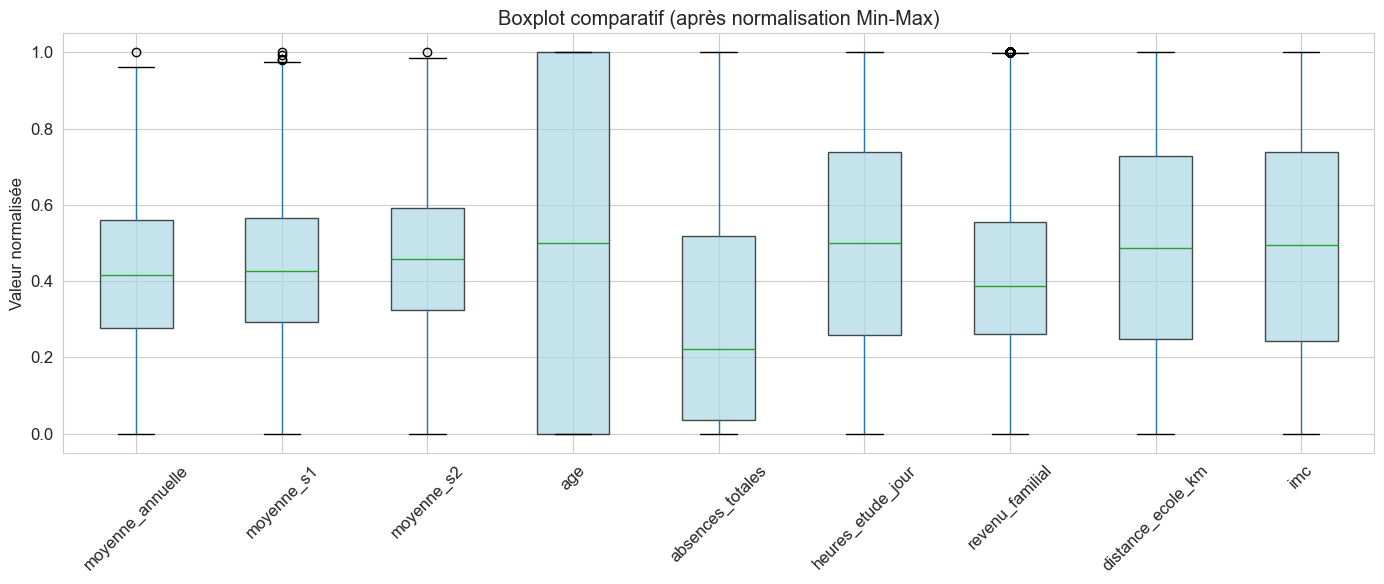

In [10]:
# === Detection des valeurs aberrantes avec IQR ===

def detect_outliers_iqr(df, col):
    """Detection des valeurs aberrantes par la methode IQR"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers), lower, upper

# Application sur les variables numeriques cles
key_numeric = ['moyenne_annuelle', 'moyenne_s1', 'moyenne_s2', 'age', 
               'absences_totales', 'heures_etude_jour', 'revenu_familial',
               'distance_ecole_km', 'imc']
key_numeric = [c for c in key_numeric if c in df.columns]

outlier_summary = []
for col in key_numeric:
    count, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Variable': col,
        'Nb_outliers': count,
        'Pourcentage_%': round(count / len(df) * 100, 2),
        'Borne_inf': round(lower, 2),
        'Borne_sup': round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Nb_outliers', ascending=False)
print("--- Resume des valeurs aberrantes (methode IQR) ---")
display(outlier_df)

# Boxplot comparatif normalise
fig, ax = plt.subplots(figsize=(14, 6))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(df[key_numeric].dropna()), 
    columns=key_numeric
)
scaled_data.boxplot(ax=ax, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7))
ax.set_title('Boxplot comparatif (apres normalisation Min-Max)')
ax.set_ylabel('Valeur normalisee')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Analyse de correlation (Correlation Analysis)
On etudie les relations lineaires entre les variables numeriques, en se concentrant sur la correlation avec la variable cible `moyenne_annuelle`.

--- Top 15 des correlations positives ---
moyenne_s2                    0.991
moyenne_s1                    0.991
moyenne_annee_precedente      0.958
performance_cible             0.936
francais_annuel               0.918
education_physique_annuel     0.918
physique_chimie_annuel        0.918
maths_annuel                  0.917
svt_annuel                    0.917
anglais_annuel                0.915
education_islamique_annuel    0.914
informatique_annuel           0.913
arabe_annuel                  0.913
histoire_geo_annuel           0.911
philosophie_annuel            0.910
dtype: float64

--- Top 10 des correlations negatives ---
nombre_membres_famille       -0.020
poids_kg                     -0.025
age                          -0.039
montant_tayssir              -0.146
rang_annee_precedente        -0.771
rang_s2                      -0.823
rang_s1                      -0.847
rang_annuel                  -0.847
annee_inscription               NaN
tentatives_bac_precedentes      NaN


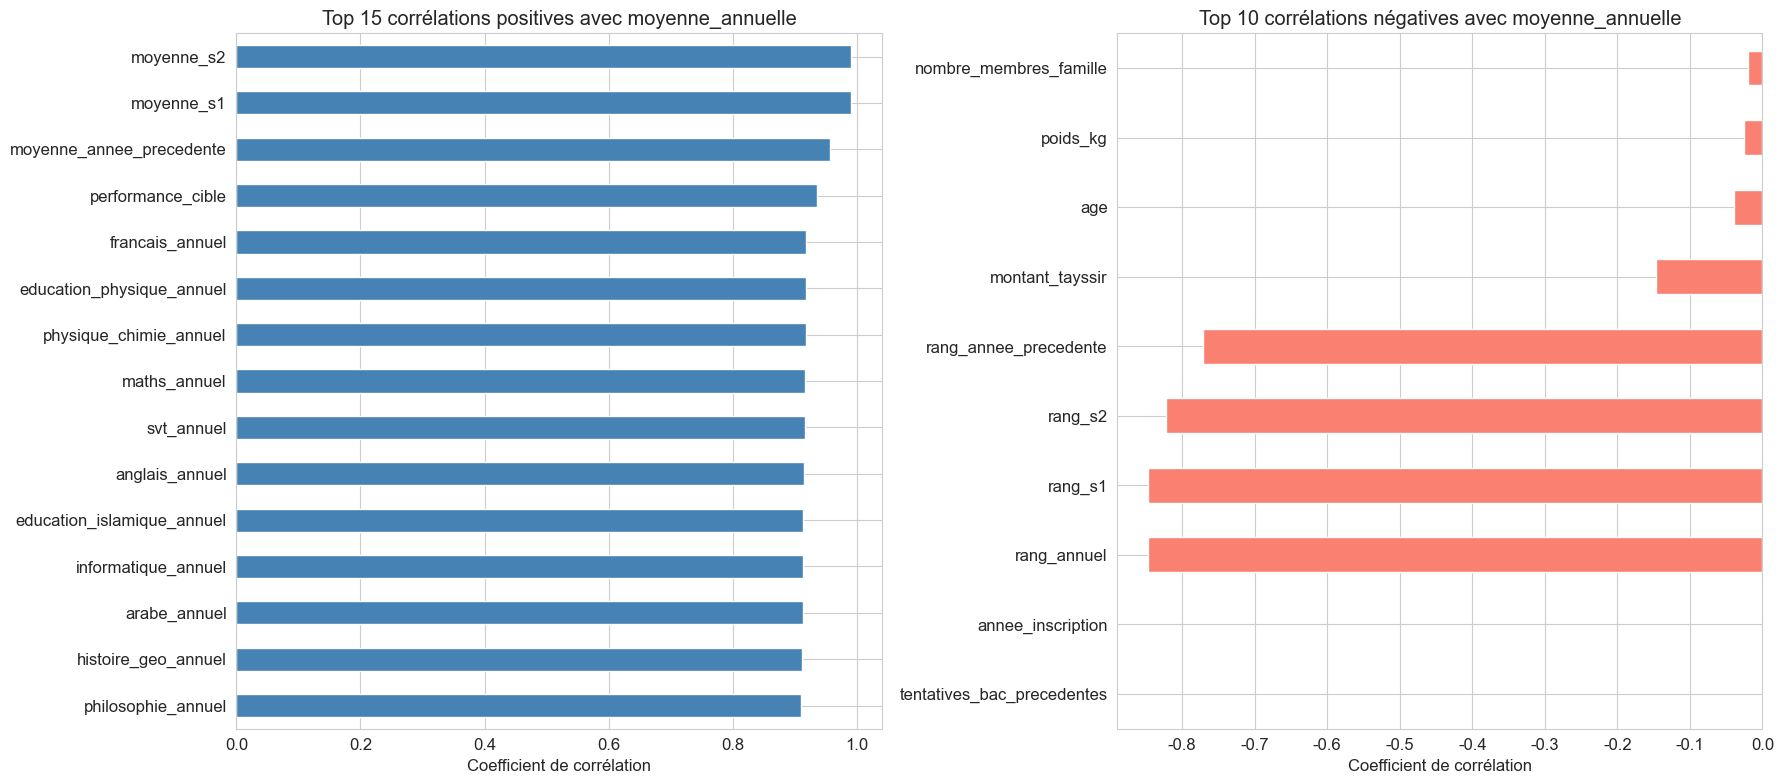

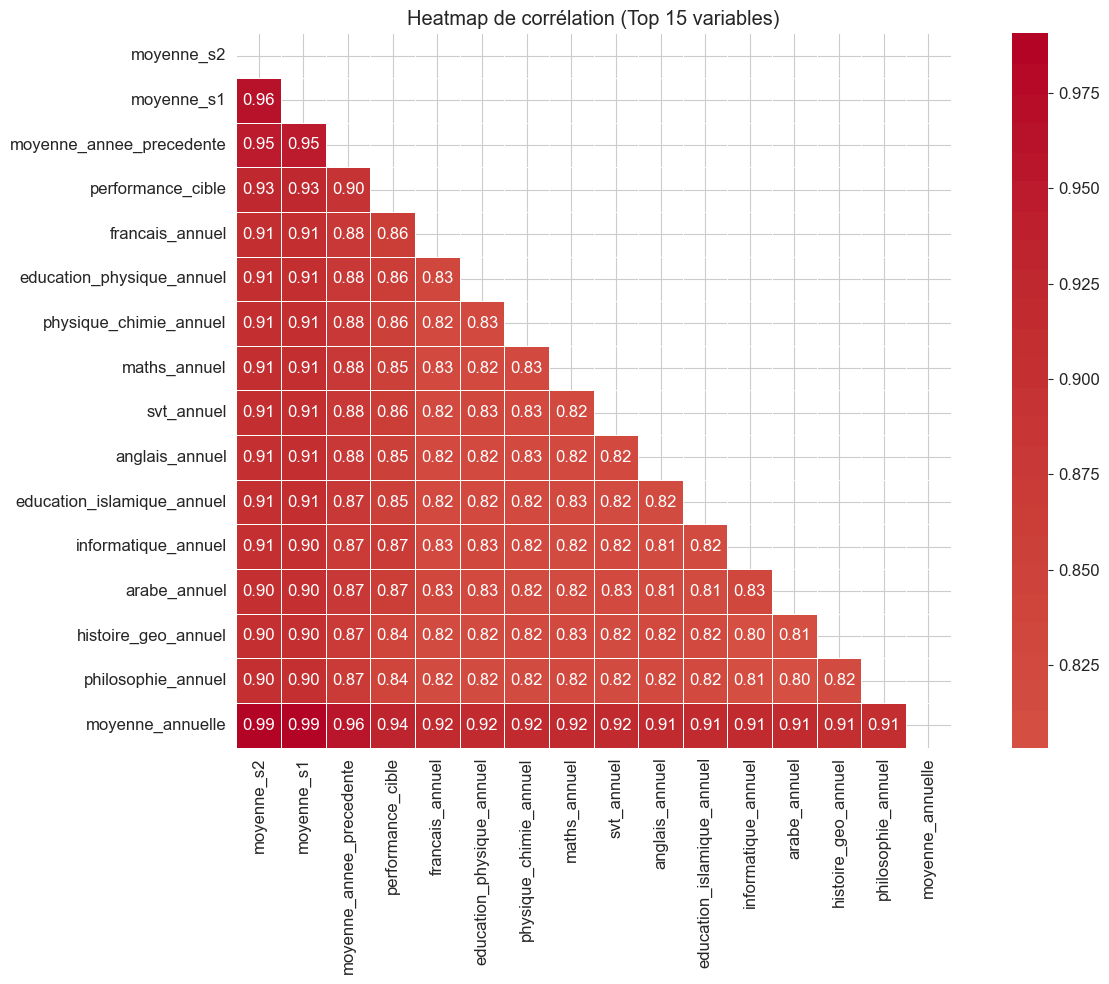

In [11]:
# === Analyse de correlation ===

# Selection des colonnes numeriques et suppression des colonnes entierement vides
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.dropna(axis=1, how='all')  # Suppression des colonnes 100% vides

target_col = 'moyenne_annuelle'

if target_col in numeric_df.columns:
    # Calcul de la correlation avec la variable cible
    correlations = numeric_df.corrwith(numeric_df[target_col]).sort_values(ascending=False)
    correlations = correlations.drop(target_col, errors='ignore')  # Suppression de l'auto-correlation
    
    # Affichage des 15 plus fortes correlations positives et 10 negatives
    print("--- Top 15 des correlations positives ---")
    print(correlations.head(15).round(3))
    print("\n--- Top 10 des correlations negatives ---")
    print(correlations.tail(10).round(3))
    
    # Graphique des correlations
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Top 15 positives
    top_pos = correlations.head(15)
    top_pos.plot(kind='barh', color='steelblue', ax=axes[0])
    axes[0].set_title('Top 15 correlations positives avec moyenne_annuelle')
    axes[0].set_xlabel('Coefficient de correlation')
    axes[0].invert_yaxis()
    
    # Top 10 negatives
    top_neg = correlations.tail(10)
    top_neg.plot(kind='barh', color='salmon', ax=axes[1])
    axes[1].set_title('Top 10 correlations negatives avec moyenne_annuelle')
    axes[1].set_xlabel('Coefficient de correlation')
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

    # Heatmap des 15 variables les plus correlees
    top_features = correlations.head(15).index.tolist()
    top_features.append(target_col)
    corr_matrix = numeric_df[top_features].corr()
    
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
                linewidths=0.5, center=0, mask=mask, square=True)
    plt.title('Heatmap de correlation (Top 15 variables)')
    plt.tight_layout()
    plt.show()

## 11. Analyse bivariee (Bivariate Analysis)
On etudie la relation des variables numeriques et categorielles avec la variable cible de maniere individuelle.

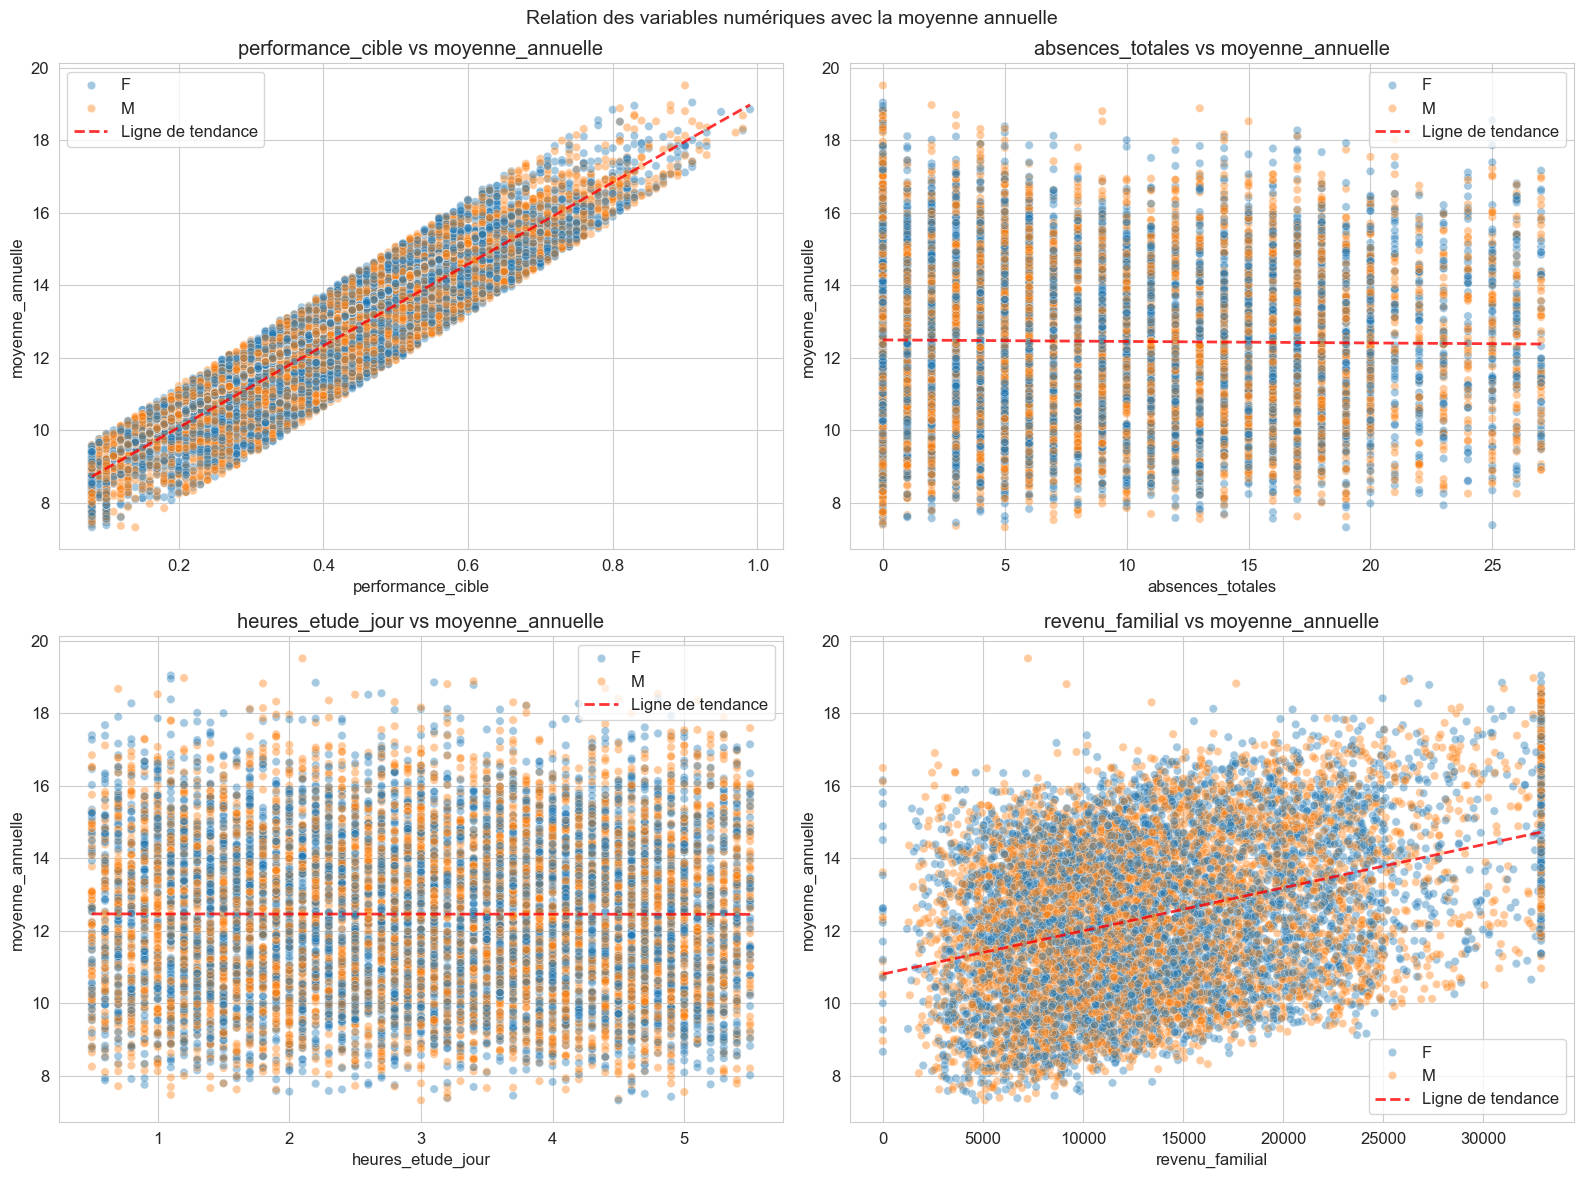

In [12]:
# === Analyse bivariee : variables numeriques vs variable cible ===

target = 'moyenne_annuelle'

# Scatter Plots : variables numeriques vs variable cible
scatter_features = ['performance_cible', 'absences_totales', 'heures_etude_jour', 'revenu_familial']
scatter_features = [c for c in scatter_features if c in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(scatter_features):
    if i < len(axes):
        sns.scatterplot(x=col, y=target, data=df, hue='sexe', alpha=0.4, ax=axes[i])
        axes[i].set_title(f'{col} vs {target}')
        
        # Ajout de la ligne de tendance
        mask = df[col].notna() & df[target].notna()
        z = np.polyfit(df.loc[mask, col], df.loc[mask, target], 1)
        p = np.poly1d(z)
        x_range = np.linspace(df[col].min(), df[col].max(), 100)
        axes[i].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2, label='Ligne de tendance')
        axes[i].legend()

plt.suptitle('Relation des variables numeriques avec la moyenne annuelle', fontsize=14)
plt.tight_layout()
plt.show()

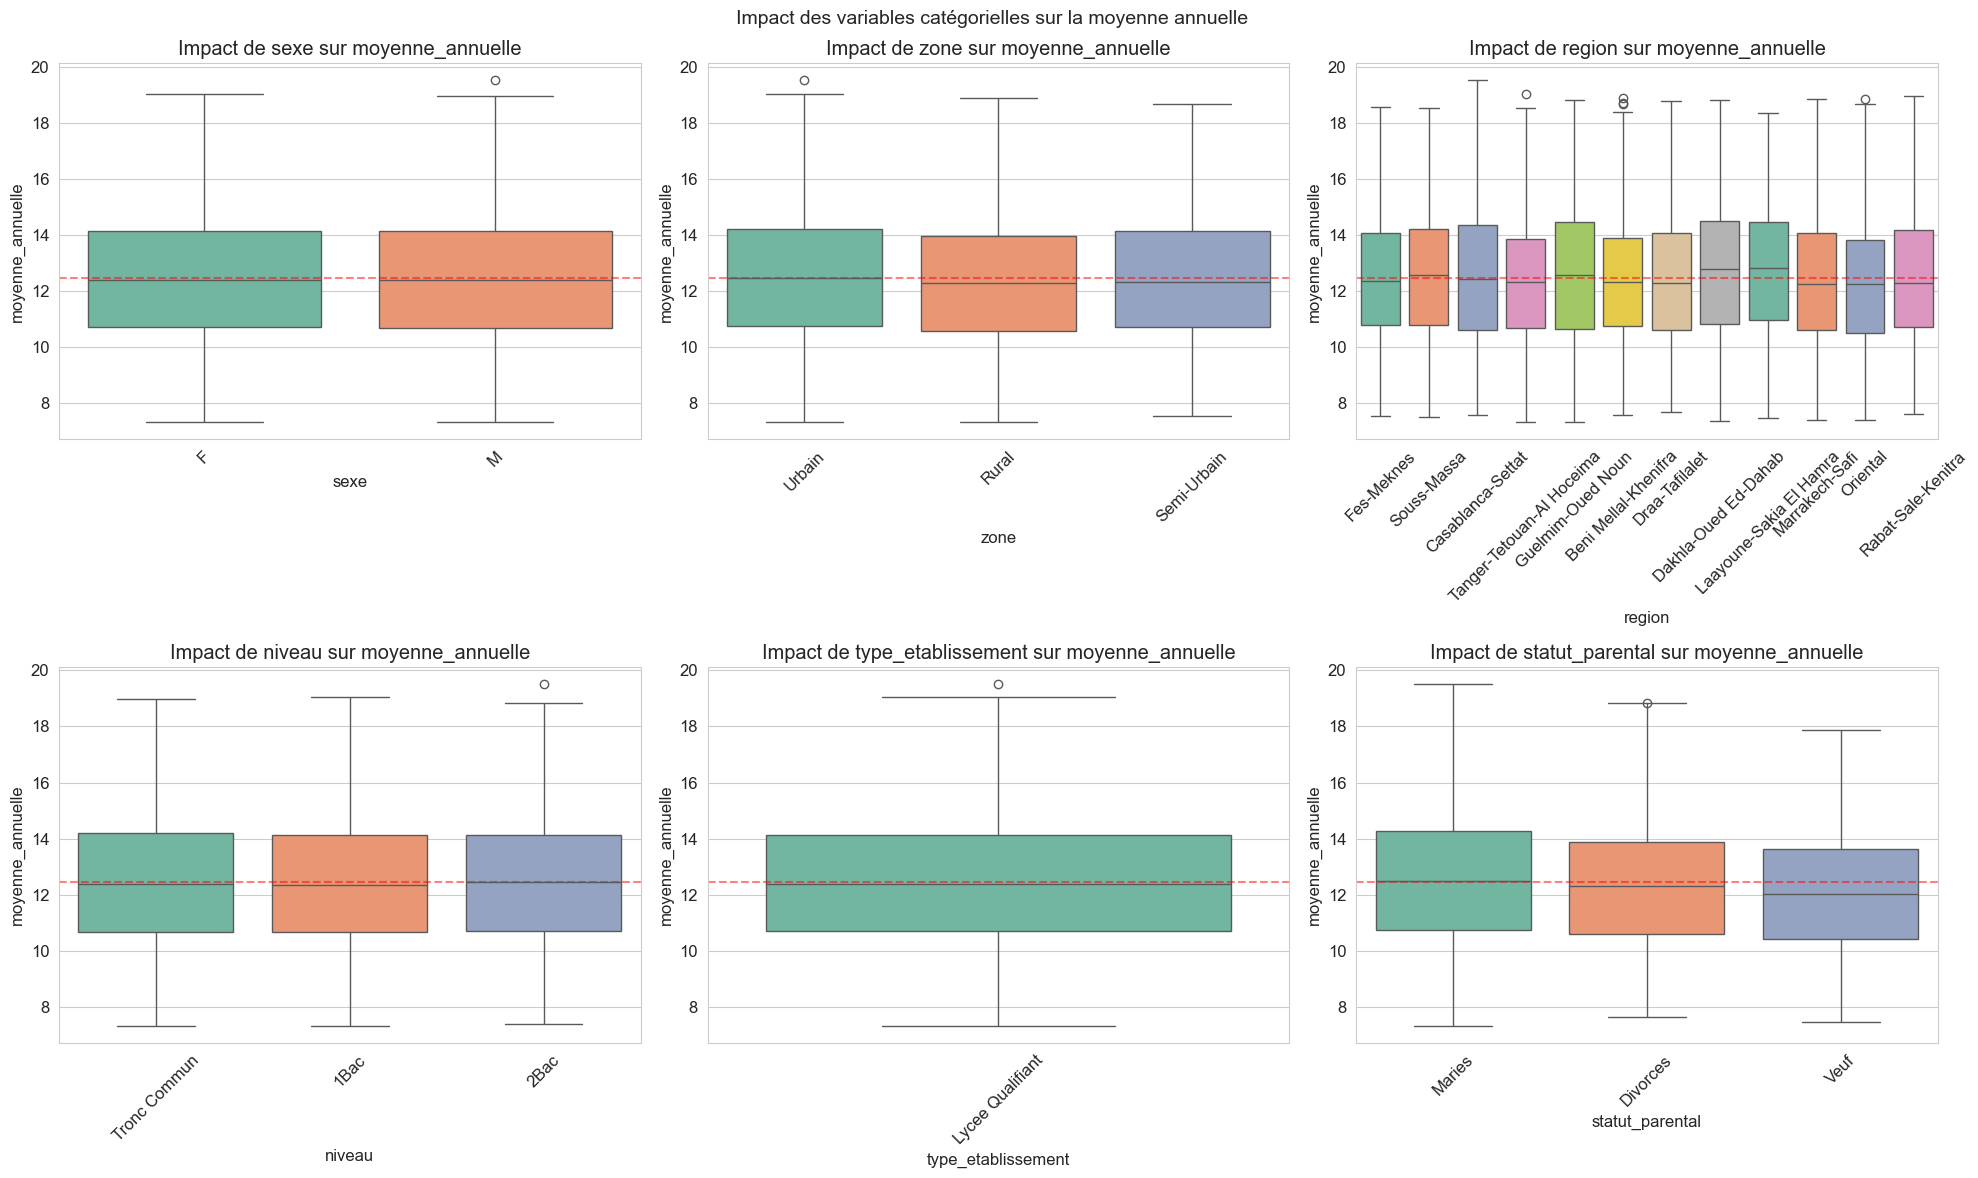

In [13]:
# === Analyse bivariee : variables categorielles vs variable cible ===

target = 'moyenne_annuelle'
cat_vs_target = ['sexe', 'zone', 'region', 'niveau', 'type_etablissement', 'statut_parental']
cat_vs_target = [c for c in cat_vs_target if c in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(cat_vs_target):
    if i < len(axes):
        sns.boxplot(x=col, y=target, data=df, hue=col, palette='Set2', 
                   legend=False, ax=axes[i])
        axes[i].set_title(f'Impact de {col} sur {target}')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Ajout de la ligne de la moyenne globale
        axes[i].axhline(df[target].mean(), color='red', linestyle='--', alpha=0.5)

for j in range(len(cat_vs_target), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Impact des variables categorielles sur la moyenne annuelle', fontsize=14)
plt.tight_layout()
plt.show()

## 12. Tableaux croises (Cross-Tabulation)
On etudie la relation entre les variables categorielles entre elles et avec le niveau de performance.

In [14]:
# === Tableaux croises ===

# 1. Sexe  Probabilite de reussite
if 'sexe' in df.columns and 'probabilite_reussite' in df.columns:
    print("--- Sexe  Probabilite de reussite ---")
    ct1 = pd.crosstab(df['sexe'], df['probabilite_reussite'], margins=True, normalize='index')
    display((ct1 * 100).round(1))
    
    ct1_counts = pd.crosstab(df['sexe'], df['probabilite_reussite'])
    ct1_counts.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
    plt.title('Distribution de la probabilite de reussite par sexe')
    plt.ylabel('Effectif')
    plt.xticks(rotation=0)
    plt.legend(title='Probabilite de reussite')
    plt.tight_layout()
    plt.show()

# 2. Zone  Probabilite de reussite
if 'zone' in df.columns and 'probabilite_reussite' in df.columns:
    print("\n--- Zone  Probabilite de reussite ---")
    ct2 = pd.crosstab(df['zone'], df['probabilite_reussite'], normalize='index')
    display((ct2 * 100).round(1))
    
    ct2_counts = pd.crosstab(df['zone'], df['probabilite_reussite'])
    ct2_counts.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
    plt.title('Distribution de la probabilite de reussite par zone (Urbain/Rural)')
    plt.ylabel('Effectif')
    plt.xticks(rotation=0)
    plt.legend(title='Probabilite de reussite')
    plt.tight_layout()
    plt.show()

# 3. Niveau scolaire  Probabilite de reussite
if 'niveau' in df.columns and 'probabilite_reussite' in df.columns:
    print("\n--- Niveau scolaire  Probabilite de reussite ---")
    ct3 = pd.crosstab(df['niveau'], df['probabilite_reussite'], normalize='index')
    display((ct3 * 100).round(1))
    
    ct3_counts = pd.crosstab(df['niveau'], df['probabilite_reussite'])
    ct3_counts.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set2')
    plt.title('Distribution de la probabilite de reussite par niveau scolaire')
    plt.ylabel('Effectif')
    plt.xticks(rotation=0)
    plt.legend(title='Probabilite de reussite')
    plt.tight_layout()
    plt.show()

## 13. Pair Plot
On trace les relations entre les variables numeriques les plus importantes, colorees selon la probabilite de reussite.

KeyError: 'probabilite_reussite'

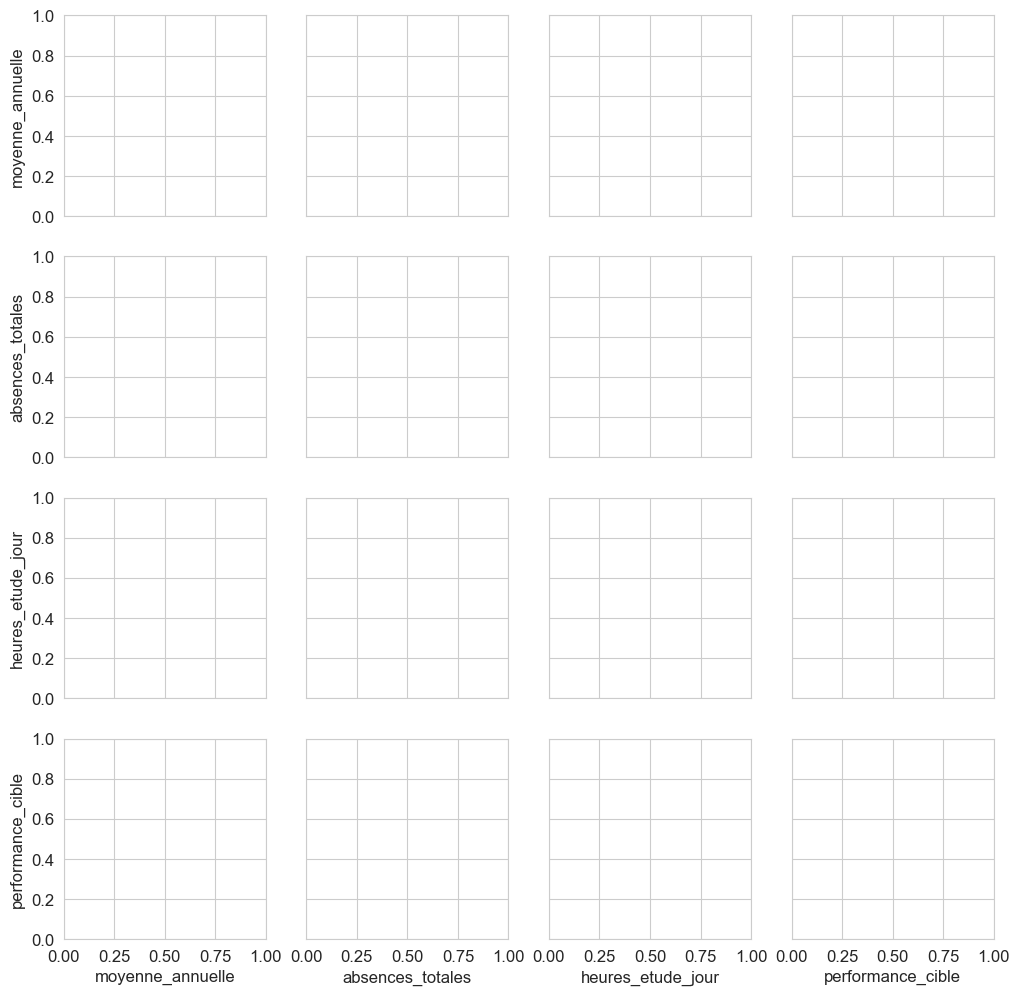

In [15]:
# === Pair Plot ===

pair_features = ['moyenne_annuelle', 'absences_totales', 'heures_etude_jour', 
                 'performance_cible', 'probabilite_reussite']
pair_features = [c for c in pair_features if c in df.columns]

# Echantillon aleatoire pour accelerer le trace (10000 points = trop lourd)
sample_df = df[pair_features].sample(n=min(2000, len(df)), random_state=42)

g = sns.pairplot(sample_df, hue='probabilite_reussite', palette='coolwarm', 
                 diag_kind='kde', plot_kws={'alpha': 0.4, 's': 20},
                 height=3)
g.figure.suptitle('Pair Plot des variables cles (echantillon de 2000 etudiants)', y=1.02, fontsize=14)
plt.show()

## 14. Resume et Conclusions

### Structure des donnees :
- Le dataset contient **10 000 lignes** et **269 colonnes** (apres nettoyage, 286 avant)
- Il comprend des informations demographiques, academiques, sociales, sanitaires et psychologiques

### Valeurs manquantes :
- Plusieurs colonnes etaient entierement vides (100%) liees aux resultats du Baccalaureat (`note_examen_regional`, `note_finale_bac`,...)
- Ces colonnes ont ete supprimees lors du nettoyage (passage de 286 a 269 colonnes)

### Variable cible :
- `moyenne_annuelle` : **variable cible principale** (numerique continue, probleme de regression)
- `performance_cible` : score numerique continu entre 0 et 1 (derive de la performance)
- `probabilite_reussite` : variable categorielle (Tres Faible, Faible, Moyen, Eleve)
- Forte correlation entre la moyenne annuelle et le score de performance

### Resultats principaux :
- La moyenne annuelle (`moyenne_annuelle`) est le meilleur indicateur de performance
- Toutes les notes des matieres sont fortement correlees avec la moyenne annuelle
- Les variables socio-economiques ont un impact relativement plus faible

### Recommandations pour le pretraitement :
1. Supprimer les colonnes entierement vides
2. Traiter les valeurs manquantes partielles
3. Encoder les variables categorielles
4. Traiter les valeurs aberrantes si necessaire
5. Selectionner les variables les plus correlees pour la modelisation

### Modeles recommandes (regression) :
- **Regression Lineaire** : modele de base pour etablir une reference
- **Random Forest Regressor** : capture les relations non-lineaires
- **XGBoost / Gradient Boosting** : performance elevee pour les donnees tabulaires
- **Deep Learning (MLP)** : reseaux de neurones pour les relations complexes

In [ ]:
# === Export des figures pour le rapport LaTeX ===
import os
fig_dir = 'rapports/figures_eda'
os.makedirs(fig_dir, exist_ok=True)

# --- Figure 1 : Valeurs manquantes ---
fig, ax = plt.subplots(figsize=(14, 6))
missing_report = pd.DataFrame({
    'Nb_manquantes': df.isnull().sum(),
    'Pourcentage_%': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_report = missing_report[missing_report['Nb_manquantes'] > 0].sort_values('Pourcentage_%', ascending=False)
bars = ax.barh(missing_report.index, missing_report['Pourcentage_%'], color='salmon')
ax.set_xlabel('Pourcentage (%)')
ax.set_title('Colonnes avec valeurs manquantes')
ax.invert_yaxis()
for bar, val in zip(bars, missing_report['Pourcentage_%']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{val}%', va='center', fontsize=9)
plt.tight_layout()
plt.savefig(f'{fig_dir}/01_valeurs_manquantes.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 2 : Variable cible ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
total = len(df)
sns.histplot(df['performance_cible'], kde=True, ax=axes[0], color='steelblue', bins=30)
axes[0].axvline(df['performance_cible'].mean(), color='red', linestyle='--', label=f'Moyenne : {df["performance_cible"].mean():.2f}')
axes[0].axvline(df['performance_cible'].median(), color='green', linestyle='--', label=f'Mediane : {df["performance_cible"].median():.2f}')
axes[0].set_title('Distribution de performance_cible')
axes[0].set_xlabel('Score de performance')
axes[0].set_ylabel('Effectif')
axes[0].legend(fontsize=9)

prob_order = ['Tres Faible', 'Faible', 'Moyen', 'Eleve']
existing_prob = [x for x in prob_order if x in df['probabilite_reussite'].values]
sns.countplot(x='probabilite_reussite', data=df, order=existing_prob, hue='probabilite_reussite', palette='coolwarm', legend=False, ax=axes[1])
axes[1].set_title('Distribution de probabilite_reussite')
axes[1].set_xlabel('Niveau de probabilite')
axes[1].set_ylabel('Effectif')
for p in axes[1].patches:
    pct = f'{100 * p.get_height() / total:.1f}%'
    axes[1].annotate(pct, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

sns.boxplot(x='probabilite_reussite', y='performance_cible', data=df, order=existing_prob, hue='probabilite_reussite', palette='coolwarm', legend=False, ax=axes[2])
axes[2].set_title('Performance par niveau de probabilite de reussite')
plt.tight_layout()
plt.savefig(f'{fig_dir}/02_variable_cible.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 3 : Distribution categorielles ---
cat_features = ['sexe', 'zone', 'region', 'niveau', 'filiere', 'type_etablissement', 'statut_parental', 'niveau_education_pere', 'niveau_education_mere']
cat_features = [c for c in cat_features if c in df.columns]
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes_flat = axes.flatten()
for i, col in enumerate(cat_features):
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, hue=col, palette='Set2', legend=False, ax=axes_flat[i])
    axes_flat[i].set_title(f'Distribution de {col}', fontsize=12)
    axes_flat[i].tick_params(axis='x', rotation=45)
    for p in axes_flat[i].patches:
        if p.get_height() > 0:
            pct = f'{100 * p.get_height() / total:.0f}%'
            axes_flat[i].annotate(pct, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
for j in range(len(cat_features), len(axes_flat)):
    axes_flat[j].set_visible(False)
plt.suptitle('Distribution des principales variables categorielles', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(f'{fig_dir}/03_distribution_categorielles.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 4 : Asymetrie ---
numeric_cols = df.select_dtypes(include=[np.number]).columns
skew_kurt = pd.DataFrame({
    'Skewness': df[numeric_cols].skew().round(3),
    'Kurtosis': df[numeric_cols].kurtosis().round(3)
}).sort_values('Skewness', ascending=False)
fig, ax = plt.subplots(figsize=(14, 5))
skew_vals = skew_kurt['Skewness'].sort_values()
colors = ['red' if abs(v) > 1 else 'steelblue' for v in skew_vals]
skew_vals.plot(kind='bar', color=colors, ax=ax)
ax.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Seuil +1')
ax.axhline(y=-1, color='red', linestyle='--', alpha=0.5, label='Seuil -1')
ax.set_title('Asymetrie (Skewness) de toutes les variables numeriques')
ax.set_ylabel('Skewness')
ax.legend()
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.savefig(f'{fig_dir}/04_skewness.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 5 : Outliers boxplot ---
from sklearn.preprocessing import MinMaxScaler
key_numeric = ['moyenne_annuelle', 'moyenne_s1', 'moyenne_s2', 'age', 'absences_totales', 'heures_etude_jour', 'revenu_familial', 'distance_ecole_km', 'imc']
key_numeric = [c for c in key_numeric if c in df.columns]
fig, ax = plt.subplots(figsize=(14, 6))
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df[key_numeric].dropna()), columns=key_numeric)
scaled_data.boxplot(ax=ax, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7))
ax.set_title('Boxplot comparatif (apres normalisation Min-Max)')
ax.set_ylabel('Valeur normalisee')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{fig_dir}/05_outliers_boxplot.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 6 : Correlations barplot ---
numeric_df = df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')
correlations = numeric_df.corrwith(numeric_df['moyenne_annuelle']).sort_values(ascending=False)
correlations = correlations.drop('moyenne_annuelle', errors='ignore')
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
top_pos = correlations.head(15)
top_pos.plot(kind='barh', color='steelblue', ax=axes[0])
axes[0].set_title('Top 15 correlations positives avec moyenne_annuelle')
axes[0].set_xlabel('Coefficient de correlation')
axes[0].invert_yaxis()
top_neg = correlations.tail(10)
top_neg.plot(kind='barh', color='salmon', ax=axes[1])
axes[1].set_title('Top 10 correlations negatives avec moyenne_annuelle')
axes[1].set_xlabel('Coefficient de correlation')
axes[1].invert_yaxis()
plt.tight_layout()
plt.savefig(f'{fig_dir}/06_correlations_barplot.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 7 : Heatmap ---
top_features = correlations.head(15).index.tolist()
top_features.append('moyenne_annuelle')
corr_matrix = numeric_df[top_features].corr()
fig = plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0, mask=mask, square=True)
plt.title('Heatmap de correlation (Top 15 variables)')
plt.tight_layout()
plt.savefig(f'{fig_dir}/07_heatmap_correlation.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 8 : Analyse bivariee numerique ---
target = 'moyenne_annuelle'
scatter_features = ['performance_cible', 'absences_totales', 'heures_etude_jour', 'revenu_familial']
scatter_features = [c for c in scatter_features if c in df.columns]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes_flat = axes.flatten()
for i, col in enumerate(scatter_features):
    sns.scatterplot(x=col, y=target, data=df, hue='sexe', alpha=0.4, ax=axes_flat[i])
    axes_flat[i].set_title(f'{col} vs {target}')
    mask = df[col].notna() & df[target].notna()
    z = np.polyfit(df.loc[mask, col], df.loc[mask, target], 1)
    p = np.poly1d(z)
    x_range = np.linspace(df[col].min(), df[col].max(), 100)
    axes_flat[i].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2, label='Ligne de tendance')
    axes_flat[i].legend()
plt.suptitle('Relation des variables numeriques avec la moyenne annuelle', fontsize=14)
plt.tight_layout()
plt.savefig(f'{fig_dir}/08_bivariate_numerique.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 9 : Analyse bivariee categorielle ---
cat_vs_target = ['sexe', 'zone', 'region', 'niveau', 'type_etablissement', 'statut_parental']
cat_vs_target = [c for c in cat_vs_target if c in df.columns]
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes_flat = axes.flatten()
for i, col in enumerate(cat_vs_target):
    sns.boxplot(x=col, y=target, data=df, hue=col, palette='Set2', legend=False, ax=axes_flat[i])
    axes_flat[i].set_title(f'Impact de {col} sur {target}')
    axes_flat[i].tick_params(axis='x', rotation=45)
    axes_flat[i].axhline(df[target].mean(), color='red', linestyle='--', alpha=0.5)
for j in range(len(cat_vs_target), len(axes_flat)):
    axes_flat[j].set_visible(False)
plt.suptitle('Impact des variables categorielles sur la moyenne annuelle', fontsize=14)
plt.tight_layout()
plt.savefig(f'{fig_dir}/09_bivariate_categorielle.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 10 : Tableaux croises ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
ct1 = pd.crosstab(df['sexe'], df['probabilite_reussite'])
ct1.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[0])
axes[0].set_title('Probabilite de reussite par sexe')
axes[0].set_ylabel('Effectif')
axes[0].tick_params(axis='x', rotation=0)
ct2 = pd.crosstab(df['zone'], df['probabilite_reussite'])
ct2.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[1])
axes[1].set_title('Probabilite de reussite par zone')
axes[1].set_ylabel('Effectif')
axes[1].tick_params(axis='x', rotation=0)
ct3 = pd.crosstab(df['niveau'], df['probabilite_reussite'])
ct3.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[2])
axes[2].set_title('Probabilite de reussite par niveau')
axes[2].set_ylabel('Effectif')
axes[2].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.savefig(f'{fig_dir}/10_cross_tabulation.png', dpi=150, bbox_inches='tight')
plt.close()

# --- Figure 11 : Distribution moyenne_annuelle ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['moyenne_annuelle'], kde=True, ax=axes[0], color='steelblue', bins=30)
axes[0].axvline(df['moyenne_annuelle'].mean(), color='red', linestyle='--', label=f'Moyenne : {df["moyenne_annuelle"].mean():.2f}')
axes[0].axvline(df['moyenne_annuelle'].median(), color='green', linestyle='--', label=f'Mediane : {df["moyenne_annuelle"].median():.2f}')
axes[0].set_title('Distribution de moyenne_annuelle')
axes[0].legend()
sns.boxplot(x=df['moyenne_annuelle'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot de moyenne_annuelle')
plt.tight_layout()
plt.savefig(f'{fig_dir}/11_distribution_moyenne.png', dpi=150, bbox_inches='tight')
plt.close()

print(f" {len(os.listdir(fig_dir))} figures exportees dans '{fig_dir}/'")
for f in sorted(os.listdir(fig_dir)):
    print(f"   {f}")

 11 figures exportees dans 'rapports/figures_eda/'
   01_valeurs_manquantes.png
   02_variable_cible.png
   03_distribution_categorielles.png
   04_skewness.png
   05_outliers_boxplot.png
   06_correlations_barplot.png
   07_heatmap_correlation.png
   08_bivariate_numerique.png
   09_bivariate_categorielle.png
   10_cross_tabulation.png
   11_distribution_moyenne.png
